In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Homework_2_function_headers_group6 import gauss
from Homework_2_function_headers_group6 import waveguide
from Homework_2_function_headers_group6 import beamprop_CN
import matplotlib.cm as cm
import matplotlib.colors as color

In [2]:
background_dark = True
if background_dark:
    plt.style.use('dark_background')

In [3]:
xa = 50
xb = 2
Nx = 251
n_cladding = 1.45
n_core = 1.46
w = 5
z_end = 100
dz = 0.5
nd = 1.455
wl = 1
dx = xa / (Nx-1)

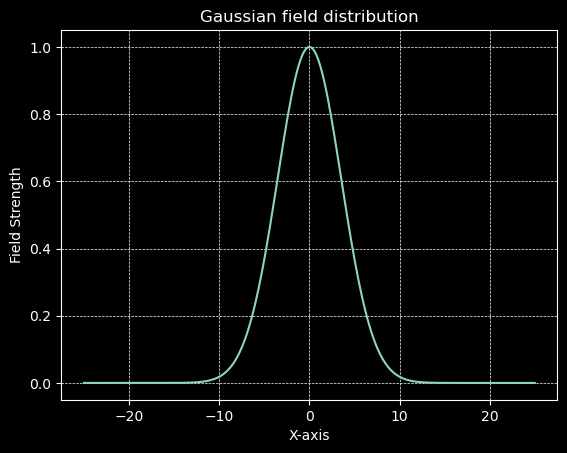

In [4]:
v_in, x = gauss(xa, Nx, w)
plt.plot(x, v_in,)
plt.title('Gaussian field distribution')
plt.xlabel('X-axis')
plt.ylabel('Field Strength')
plt.grid(lw=0.5, linestyle='--')

Text(0, 0.5, 'Refractive index')

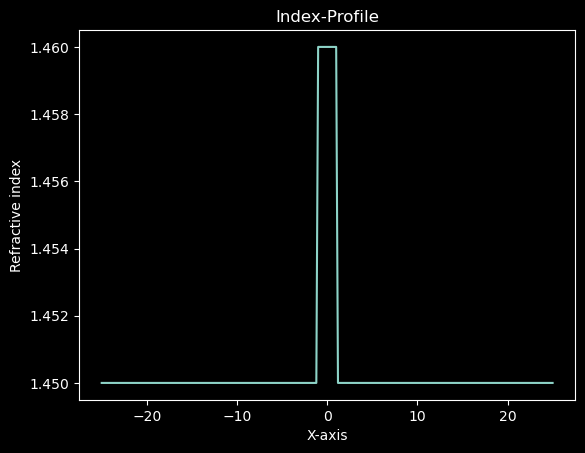

In [5]:
n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
plt.plot(x, n)
plt.title('Index-Profile')
plt.xlabel('X-axis')
plt.ylabel('Refractive index')

In [6]:
v_out, z = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)

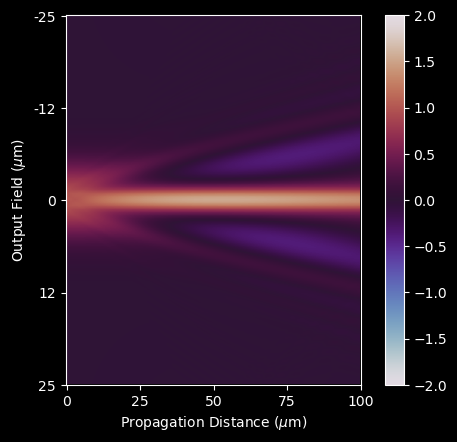

In [7]:
norm = color.Normalize(-2., 2.)
bar = cm.ScalarMappable(norm=norm, cmap="twilight")
plt.imshow(v_out.real, cmap="twilight", vmin=-2., vmax=2.)
plt.xlabel(r"Propagation Distance ($\mu$m)")
plt.ylabel("Output Field ($\mu$m)")
plt.yticks(np.linspace(0,Nx,5), np.linspace(-25, 25, 5).astype("int"))
plt.xticks(np.linspace(0,len(z),5), np.linspace(0, 100, 5).astype("int"))
plt.colorbar(bar)

In [104]:
dx = xa / (5001-1)
v_in, x = gauss(xa, 5001, w)
n, x = waveguide(xa, xb, 5001, n_cladding, n_core)
v_ref, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)
v_ref = v_ref[::5001//50,:].real
rmse = []
Nx = np.linspace(51, 1001, 20).astype('int')
for N in Nx:
    dx = xa / (N-1)
    v_in, x = gauss(xa, N, w)
    n, x = waveguide(xa, xb, N, n_cladding, n_core)
    v_out, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)
    rmse.append(np.sqrt(np.mean(v_out.real[::N//50,:] - v_ref)**2))

Text(0.5, 1.0, 'Convergence of the transmission function \n upon variation of Number of grid points')

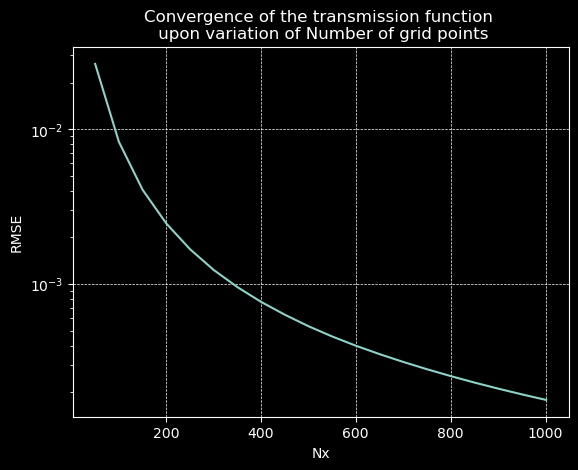

In [105]:
plt.plot(Nx, rmse)
plt.yscale('log')
plt.grid(lw=0.5, linestyle='--')
plt.xlabel('Number of grid points')
plt.ylabel('RMSE')
plt.title('Convergence of the transmission function \n upon variation of Number of grid points')

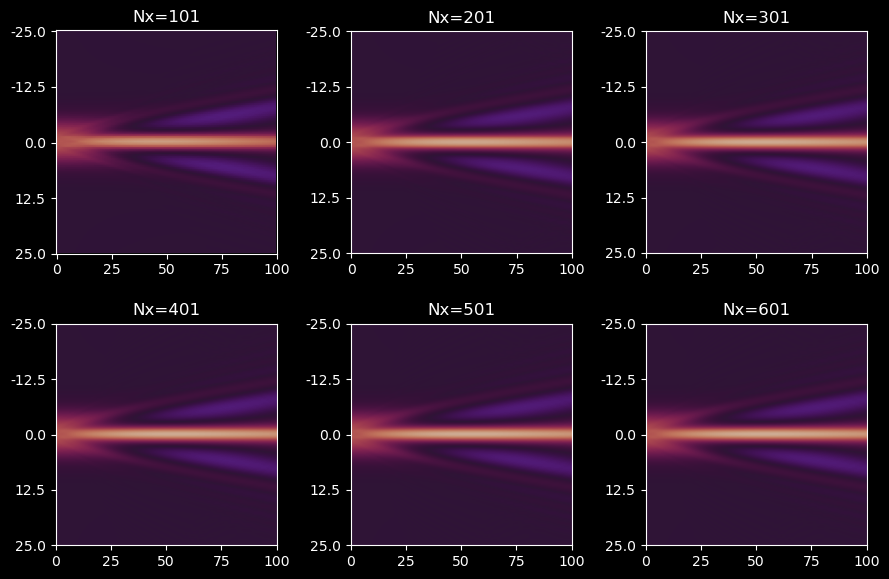

In [106]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
dz = 0.5
for Nx, ax in zip([101, 201, 301, 401, 501, 601], axes.flatten()):
    dx = xa / (Nx-1)
    dz = 100 / (Nx-1)
    v_in, x = gauss(xa, Nx, w)
    n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
    v_out, z = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz, output_step=1)
    ax.imshow(v_out.real, cmap="twilight", vmin=-2., vmax=2.)
    ax.set_title(r'Nx=%i'%Nx)
    ax.set_yticks(np.linspace(0,Nx,5), np.linspace(-25, 25, 5))
    ax.set_xticks(np.linspace(0,len(z),5), np.linspace(0, 100, 5).astype("int"))
plt.tight_layout()

In [107]:
Nx = 401
dx = xa / (Nx - 1)
dz = 0.001
v_in, x = gauss(xa, Nx, w)
n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
v_ref, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)
v_ref = v_ref[:, ::int(1/0.001)].real
rmse = []
dz = np.linspace(0, 200, 21)
dz[0] += 1
dz = 1 / dz
for d in dz:
    v_out, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, d)
    rmse.append(np.sqrt(np.mean(v_out.real[:, ::int(1/d)] - v_ref) ** 2))

Text(0.5, 1.0, 'Convergence of the transmission function \n upon variation of Step sizes in propagation direction')

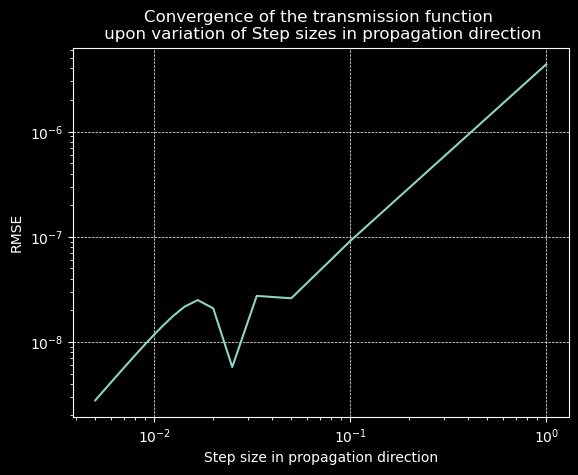

In [108]:
plt.plot(dz, rmse)
plt.yscale('log')
plt.xscale('log')
plt.grid(lw=0.5, linestyle='--')
plt.xlabel('Step size in propagation direction')
plt.ylabel('RMSE')
plt.title('Convergence of the transmission function \n upon variation of Step sizes in propagation direction')